<a href="https://colab.research.google.com/github/kumarirakhi19/1st-project-play-store-app/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**
There are many apps found on  Play Store. With this project I will take a journey of analyzing various apps found on the play store with the help of different python libraries.
Dataset: It consists of 13 columns:- App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, and Android Ver with 10841 Rows.

**Imports**: Let us start by importing some of the required libraries with which we will be working on.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt
import numpy as np




In [ ]:
# Mounted The drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# creating the path
path='/content/drive/MyDrive/Colab Notebooks/Play Store Data.csv'


In [ ]:
#Loading data set in pandas dataframe
df=pd.read_csv(path)

**After loading the dataset, we can start the exploration but before that, we need to check and see that the dataset is ready for performing several exploration operations or not, so let’s first have a look at the structure and the manner in which the data is organized.**

In [ ]:
# First look
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
df.info

<bound method DataFrame.info of                                                      App  ...         Android Ver
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
1                                    Coloring book moana  ...        4.0.3 and up
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                  Sketch - Draw & Paint  ...          4.2 and up
4                  Pixel Draw - Number Art Coloring Book  ...          4.4 and up
...                                                  ...  ...                 ...
10836                                   Sya9a Maroc - FR  ...          4.1 and up
10837                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10838                             Parkinson Exercices FR  ...          2.2 and up
10839                      The SCP Foundation DB fr nn5n  ...  Varies with device
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...  Var

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# **DataPreparation and Cleaning**
 
  Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data. Data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a dataset, table, or database and refers to identifying incomplete, incorrect, inaccurate, or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data. We saw that the dataset contains many Null or missing values. The column Rating, Type , Content Rating , Current Ver , andAndroid Ver contains 1474, 1, 1, 8, and 3 missing values respectively.



In [ ]:
#To know if there is any missing value or Nan value in dataset ,we use the isnull() function
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**Now we can start the process of data cleaning, lets start with the column**

we can define a function to get more useful information about the different attributes of the dataset, also there is one more valid point in defining a function which it will be reusable, and we are going to utilize our defined function several times in future.

In [ ]:
def printinfo():
    app = pd.DataFrame(index=df.columns)
    app['data_type'] = df.dtypes
    app['null_count'] = df.isnull().sum()
    app['unique_count'] = df.nunique()
    return app

Let’s call the function and see what it returns:

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


We have some useful information about the dataset. i.e., we can now see the missing number of values of any attribute, its unique count, and its respective data types.

Now we can start the process of data cleaning, lets start with the column **TYPE**

In [ ]:
df[df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Since there is only one missing value in this column, So, let’s fill the missing value. After cross-checking in the play store the missing value is found to be Free, So now we can fill the missing value with free

In [ ]:
df['Type'].fillna('Free',inplace=True)

In [ ]:
#After filling the value we can check and see ,if that has been correctly placed
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Now, we can move on to the column **Content Rating** :

In [ ]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


By, looking only at these rows it is not easy to say what's actually missing in this row. let us have a look at all of its near rows data. For this purpose, we have using loc function.

In [ ]:
df.loc[10468:10477,:]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,"10,000+",Free,0,Everyone,Personalization,"September 27, 2017",4.0,4.0 and up


We can clearly see that row 10472 has missing data for the Categorycolumn.A better idea will be to drop this row from our data frame.

In [ ]:
df.dropna(subset=['Content Rating'],inplace=True)

Now, we can fix the **Rating column** which contains a total of 1474 of missing values. Replacing the missing values with the Mode value of that entire column.


In [ ]:
modeValueRating = df['Rating'].mode()

In [ ]:
df['Rating'].fillna(value=modeValueRating[0], inplace = True)

Now, we can move on to the column **Anderoid Ver**

Here, there are eight missing value in this column, So, let’s fill the missing value.we are filling the missing value with free.

In [ ]:
df['Android Ver'].fillna('Free',inplace=True)

We are not using **current ver** column which will be of not much use in the analysis process. So let’s drop those columns.

In [ ]:
df.drop(['Current Ver'], axis=1, inplace=True)

After filling the value we can check and see if that has been correctly placed.

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Android Ver       0
dtype: int64

Finally, after fixing all the missing values, we should have a look at our data frame, We defined a function as printinfo() . So, it’s time to use that function.

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


All the columns have the null_count as zero, which indicates that now the data frame doesn’t contain any missing values.
Now we are done with the data cleansing part and in a state to start the work for data preparation

**DATA PREPARATION**

Columns like Reviews, Size, Installs, & price should have an int or float data type, But here we can see of object type, So let’s convert them to their respective correct type.

Starting with the column **Reviews** , converting its type to int .

In [ ]:
df['Reviews'] = df.Reviews.astype(int)

We can see that the changes have taken its effect or not by calling our printinfo() function.


In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


Now, the reviews column has been converted to int type, so now we can move to the **Column: Size**

In [ ]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10840, dtype: object

Converting the Size Column from object to integer, but this column contains some of the special characters like , , + , M , K & also it has a some of the value as Varies with device . We need to remove all of these and then convert it to int or float

Removing the +Symbol:


In [ ]:
df['Size'] = df.Size.apply(lambda x: x.strip('+'))

Removing the , symbol:

In [ ]:
df['Size'] = df.Size.apply(lambda x: x.replace(',', ''))

Replacing the M symbol by multiplying the value with 1000000:

In [ ]:
df['Size'] = df.Size.apply(lambda x: x.replace('M', 'e+6'))

Replacing the k by multiplying the value with 1000:

In [ ]:
df['Size'] = df.Size.apply(lambda x: x.replace('k', 'e+3'))

In next step required numpy.so import numpy libraries

Replacing the Varies with device value with Nan

In [ ]:
df['Size'] = df.Size.replace('Varies with device', np.NaN)

Now, finally converting all these values to numeric type:

In [ ]:
df['Size'] = pd.to_numeric(df['Size'])

Since we converted the Varies with device value to Nan , so we have to do something with those set of Nan values data. It will be a better idea to drop the Rows of the column Size having Nanvalues because it will be not an efficient idea to replace those values with mean or mode since the size of some apps would be too large and some of them too small.

In [ ]:
df.dropna(subset = ['Size'], inplace=True)

Column: **Installs :**

To convert this column from object to integer type. First of all, we will need to remove the +symbol from these values.

In [ ]:
df['Installs'] = df.Installs.apply(lambda x: x.strip('+'))

and then let’s remove the , symbol from the numbers.

In [ ]:
df['Installs'] = df.Installs.apply(lambda x: x.replace(',', ''))

Lastly, we can now convert it from string type to numeric type, and then have a look at our dataset.

In [ ]:
df['Installs'] = pd.to_numeric(df['Installs'])

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


Column: Price :

Converting this column from object to Numeric type.

In [ ]:
df['Price'].value_counts()

0          8421
$0.99       145
$2.99       114
$1.99        66
$4.99        65
           ... 
$299.99       1
$2.60         1
$15.99        1
$1.29         1
$2.90         1
Name: Price, Length: 87, dtype: int64

The values contain a special symbol $ which can be removed and then converted to the numeric type.

In [ ]:
df['Price'] = df.Price.apply(lambda x: x.strip('$'))

In [ ]:
df['Price'] = pd.to_numeric(df['Price'])

After fixing all the issues, we should have a final look at the data frame.

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9145 non-null   object 
 11  Android Ver     9145 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 928.8+ KB


Now, we are finally done. In this section Data Preparation and Cleaning. We can see that the original dataset contained 10840 Rows and 12 Columns. It contained App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Curernt Ver, and Android Ver Columns. But after cleansing the dataset and dropping the unwanted rows and columns having Null Values and Garbage data from the data frame, we are left with 10838 Rows and 12 Columns.


**Exploratory Analysis and Visualization**

 Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images.This communication is achieved through the use of a systematic mapping between graphic marks and data values in the creation of the visualization. This mapping establishes how data values will be represented visually, determining how and to what extent the property of a graphic mark, such as size or color, will change to reflect changes in the value of a datum.

In [ ]:
#I try to get information about app
df['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Fr. Mike Schmitz Audio Teachings', 'Parkinson Exercices FR',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9145 non-null   object 
 11  Android Ver     9145 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 928.8+ KB


Let’s take a look on all the category for explore the data

Now it is time to unveil the real strength of data analysis, i.e., to get an insight, and learn the trend, pattern and get answers to some of the questions related to the dataset.

#  1.which anderoid version  should have before accessing the app 

In [ ]:
#check the type of anderoid version
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.2 and up',
       '5.0 and up', '6.0 and up', '1.6 and up', '2.1 and up',
       '5.1 and up', '1.5 and up', '7.0 and up', '4.3 and up',
       '4.0.3 - 7.1.1', '2.0 and up', '2.3.3 and up',
       'Varies with device', '3.2 and up', '4.4W and up', '7.1 and up',
       '7.0 - 7.1.1', '8.0 and up', '5.0 - 8.0', '3.1 and up',
       '2.0.1 and up', '4.1 - 7.1.1', 'Free', '5.0 - 6.0', '1.0 and up',
       '2.2 - 7.1.1', '5.0 - 7.1.1'], dtype=object)

Now,I am going to group it to 1 till 8 version .change the null value to 1

In [ ]:
df['Android Ver'].replace(to_replace=['4.4W and up','Varies with device'],value=['4.4','1.0'],inplace=True)

In [ ]:
df['Android Ver'].replace({k:'1.0' for k in ['1.0','1.0 and up','1.5 and up''1.6 and up']},inplace=True)
df['Android Ver'].replace({k:'2.0' for k in ['2.0 and up','2.0.1 and up''2.1 and up','2.2 and up','2.2-7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
df['Android Ver'].replace({k:'3.0' for k in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
df['Android Ver'].replace({k:'4.0' for k in ['4.0 and up','4.0.3 and up','4.0.3-7.1.1','4.1 and up','4.1-7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
df['Android Ver'].replace({k:'5.0' for k in ['5.0-6.0','5.0-7.1.1','5.0-8.0','5.0 and up','5.1 and up']},inplace=True)
df['Android Ver'].replace({k:'6.0' for k in ['6.0 and up']},inplace=True)
df['Android Ver'].replace({k:'7.0' for k in ['7.0-7.1.1','7.0 and up','7.1 and up']},inplace=True)
df['Android Ver'].replace({k:'8.0' for k in ['8.0 and up']},inplace=True)
df['Android Ver'].fillna('1.0',inplace=True)

In [ ]:
#using group by method
print(df.groupby('Category')['Android Ver'].value_counts())


Category           Android Ver
ART_AND_DESIGN     4.0            51
                   2.0             8
                   3.0             2
                   5.0             1
AUTO_AND_VEHICLES  4.0            58
                                  ..
WEATHER            5.0             7
                   1.0             2
                   2.1 and up      2
                   1.6 and up      1
                   3.0             1
Name: Android Ver, Length: 245, dtype: int64


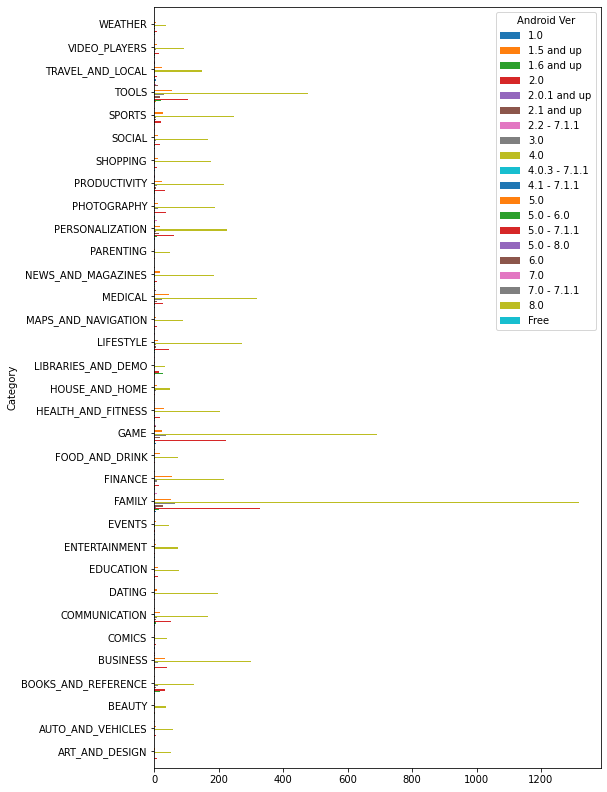

In [ ]:
Type_cat = df.groupby('Category')['Android Ver'].value_counts().unstack().plot.barh(figsize=(8,14), width=1)
plt.show()

**RESULT**


1.   mostly round 4 version is used in every category
2.  category family is used more app and then followed by game



### **2.How many category and which one is famous category**

In [ ]:
#check how many category are present
cat_df=df['Category'].unique()
cat_df

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

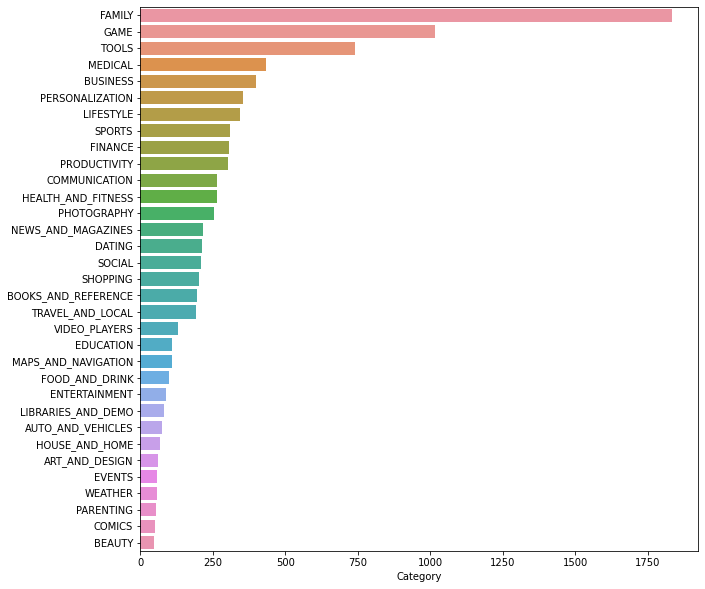

In [ ]:
#plotting the graph
plt.figure(figsize=(10,10))
most_cat=df.Category.value_counts()
sns.barplot(x=most_cat,y=most_cat.index,data=df)

**RESULT**


1.  There are 34 category are present in this data set.
2.  There is around 2000 app with family category ,followed by game category with 1200 app.And this 1.9 category,i donot know what it is but it had only 1 app .so,its not visible on graph.



## 3.How rating of apps look like.see rating patern of each category

In [ ]:
df.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

There we had a null values,i m going to leave it as it is .and a 19 for rating is not possible ,so i assume it's a 1.9.

Let's see the distribution value on rating column

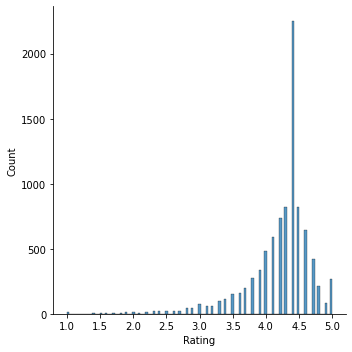

In [ ]:
df['Rating'].replace(to_replace=[19.0],value=[1.9],inplace=True)
sns.displot(df.Rating)

Let's see how rating is distributed by category column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

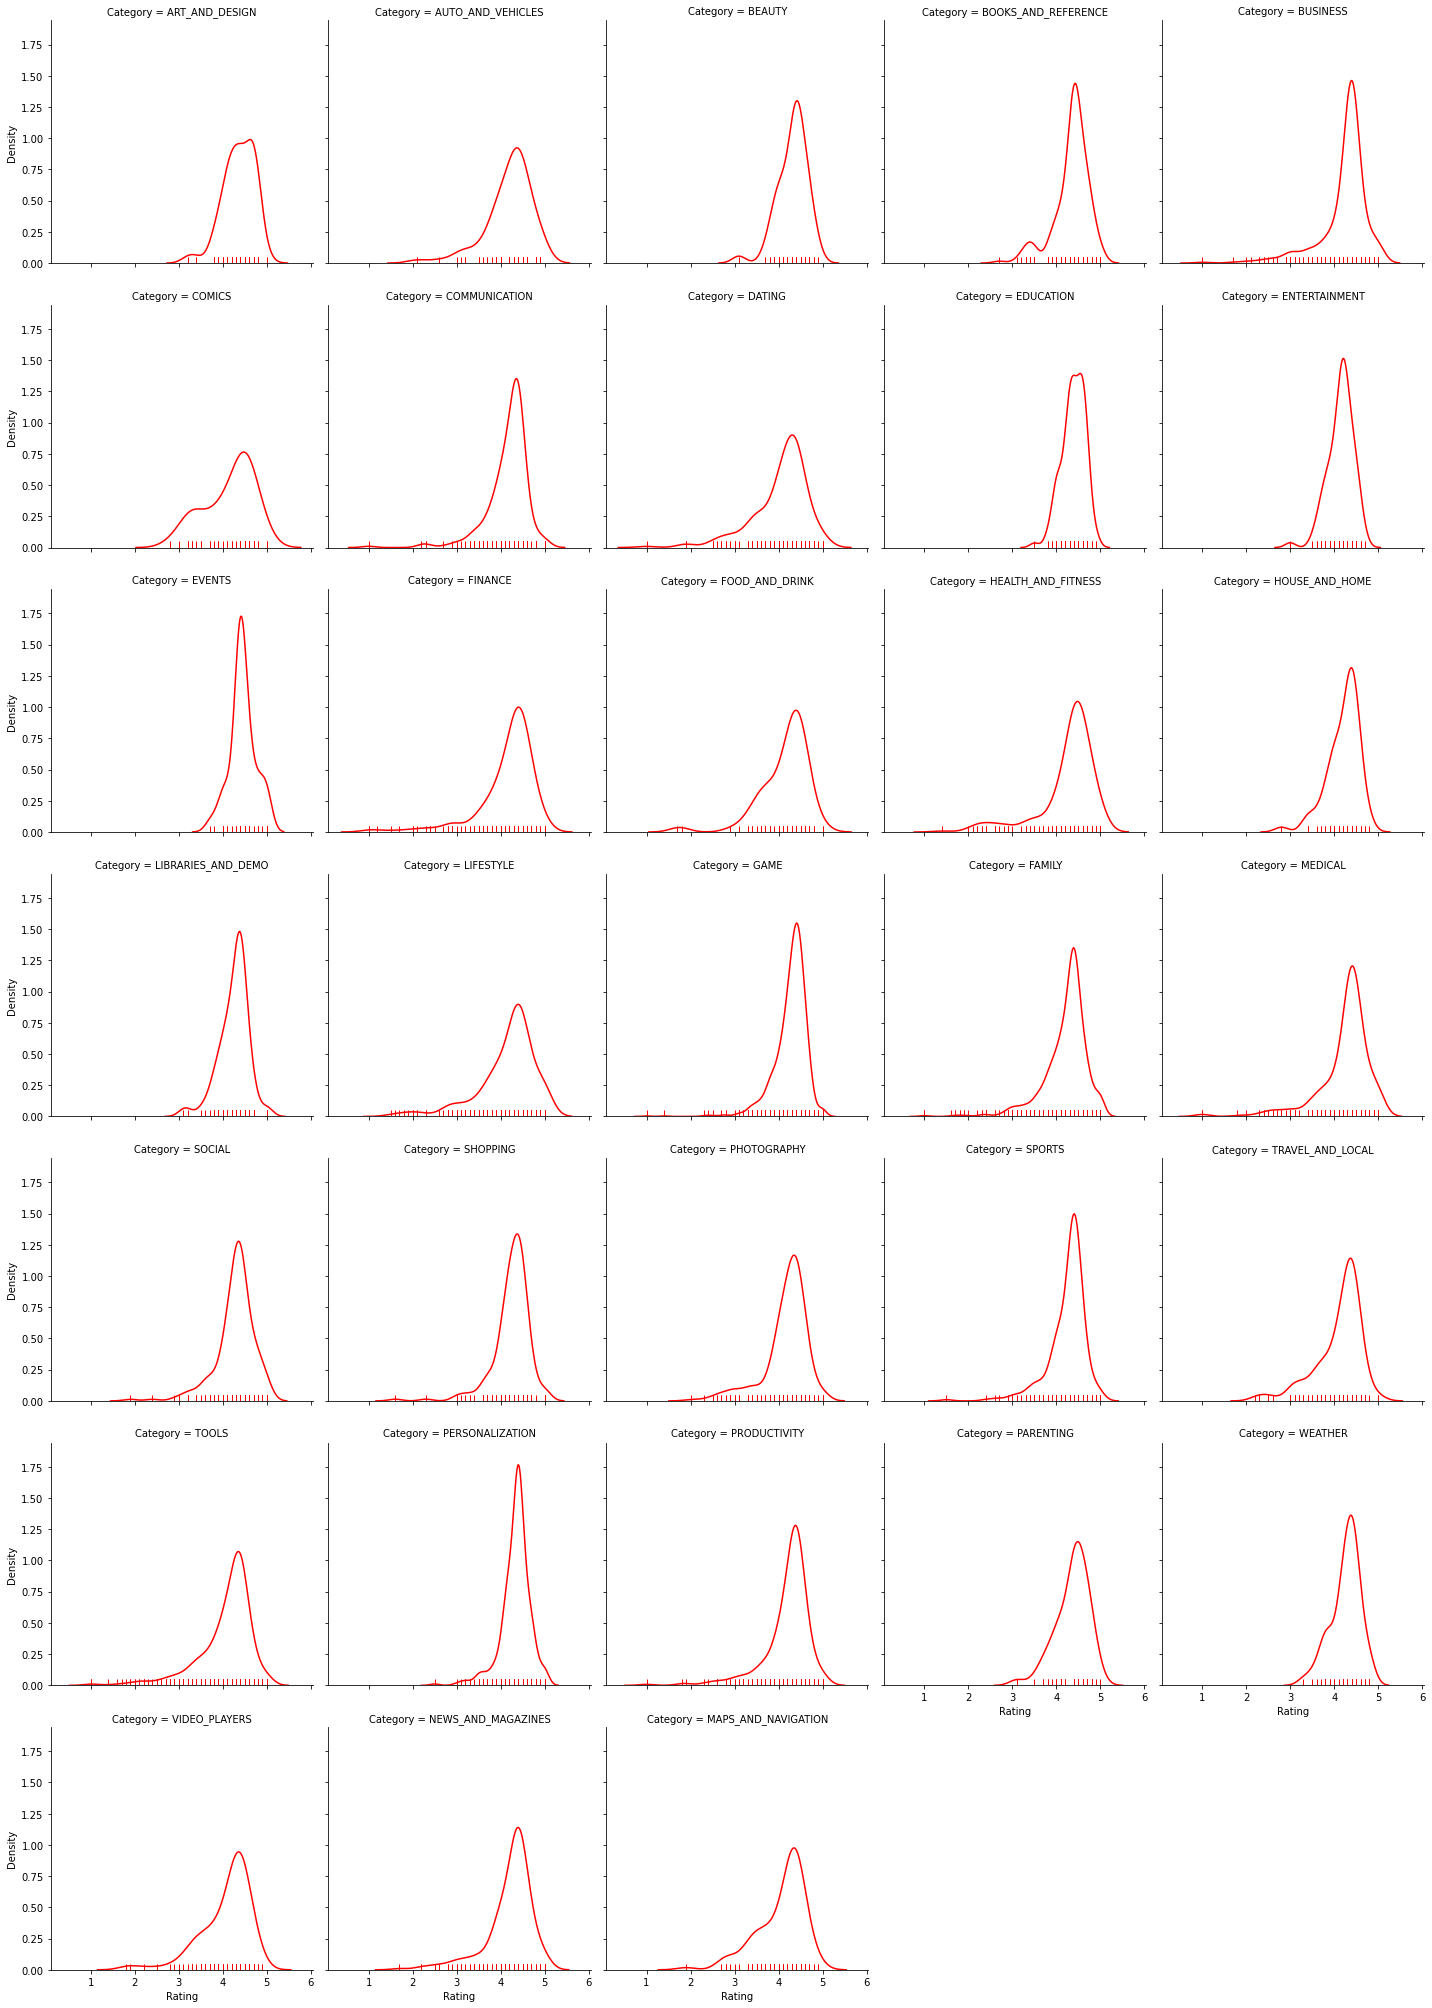

In [ ]:
g = sns.FacetGrid(df, col='Category', palette="Set1",  col_wrap=5, height=4)
g = (g.map(sns.distplot, "Rating", hist=False, rug=True, color="r"))

**RESULT**

Most of the rating is around 4

more rating is in game app







## 4.Which category has alots of review .Is more installation more review ?

Review sometime can measure the app popularity.The more reviews ,the better

In [ ]:
df.Reviews.unique()

array([   159,    967,  87510, ...,    603,   1195, 398307])

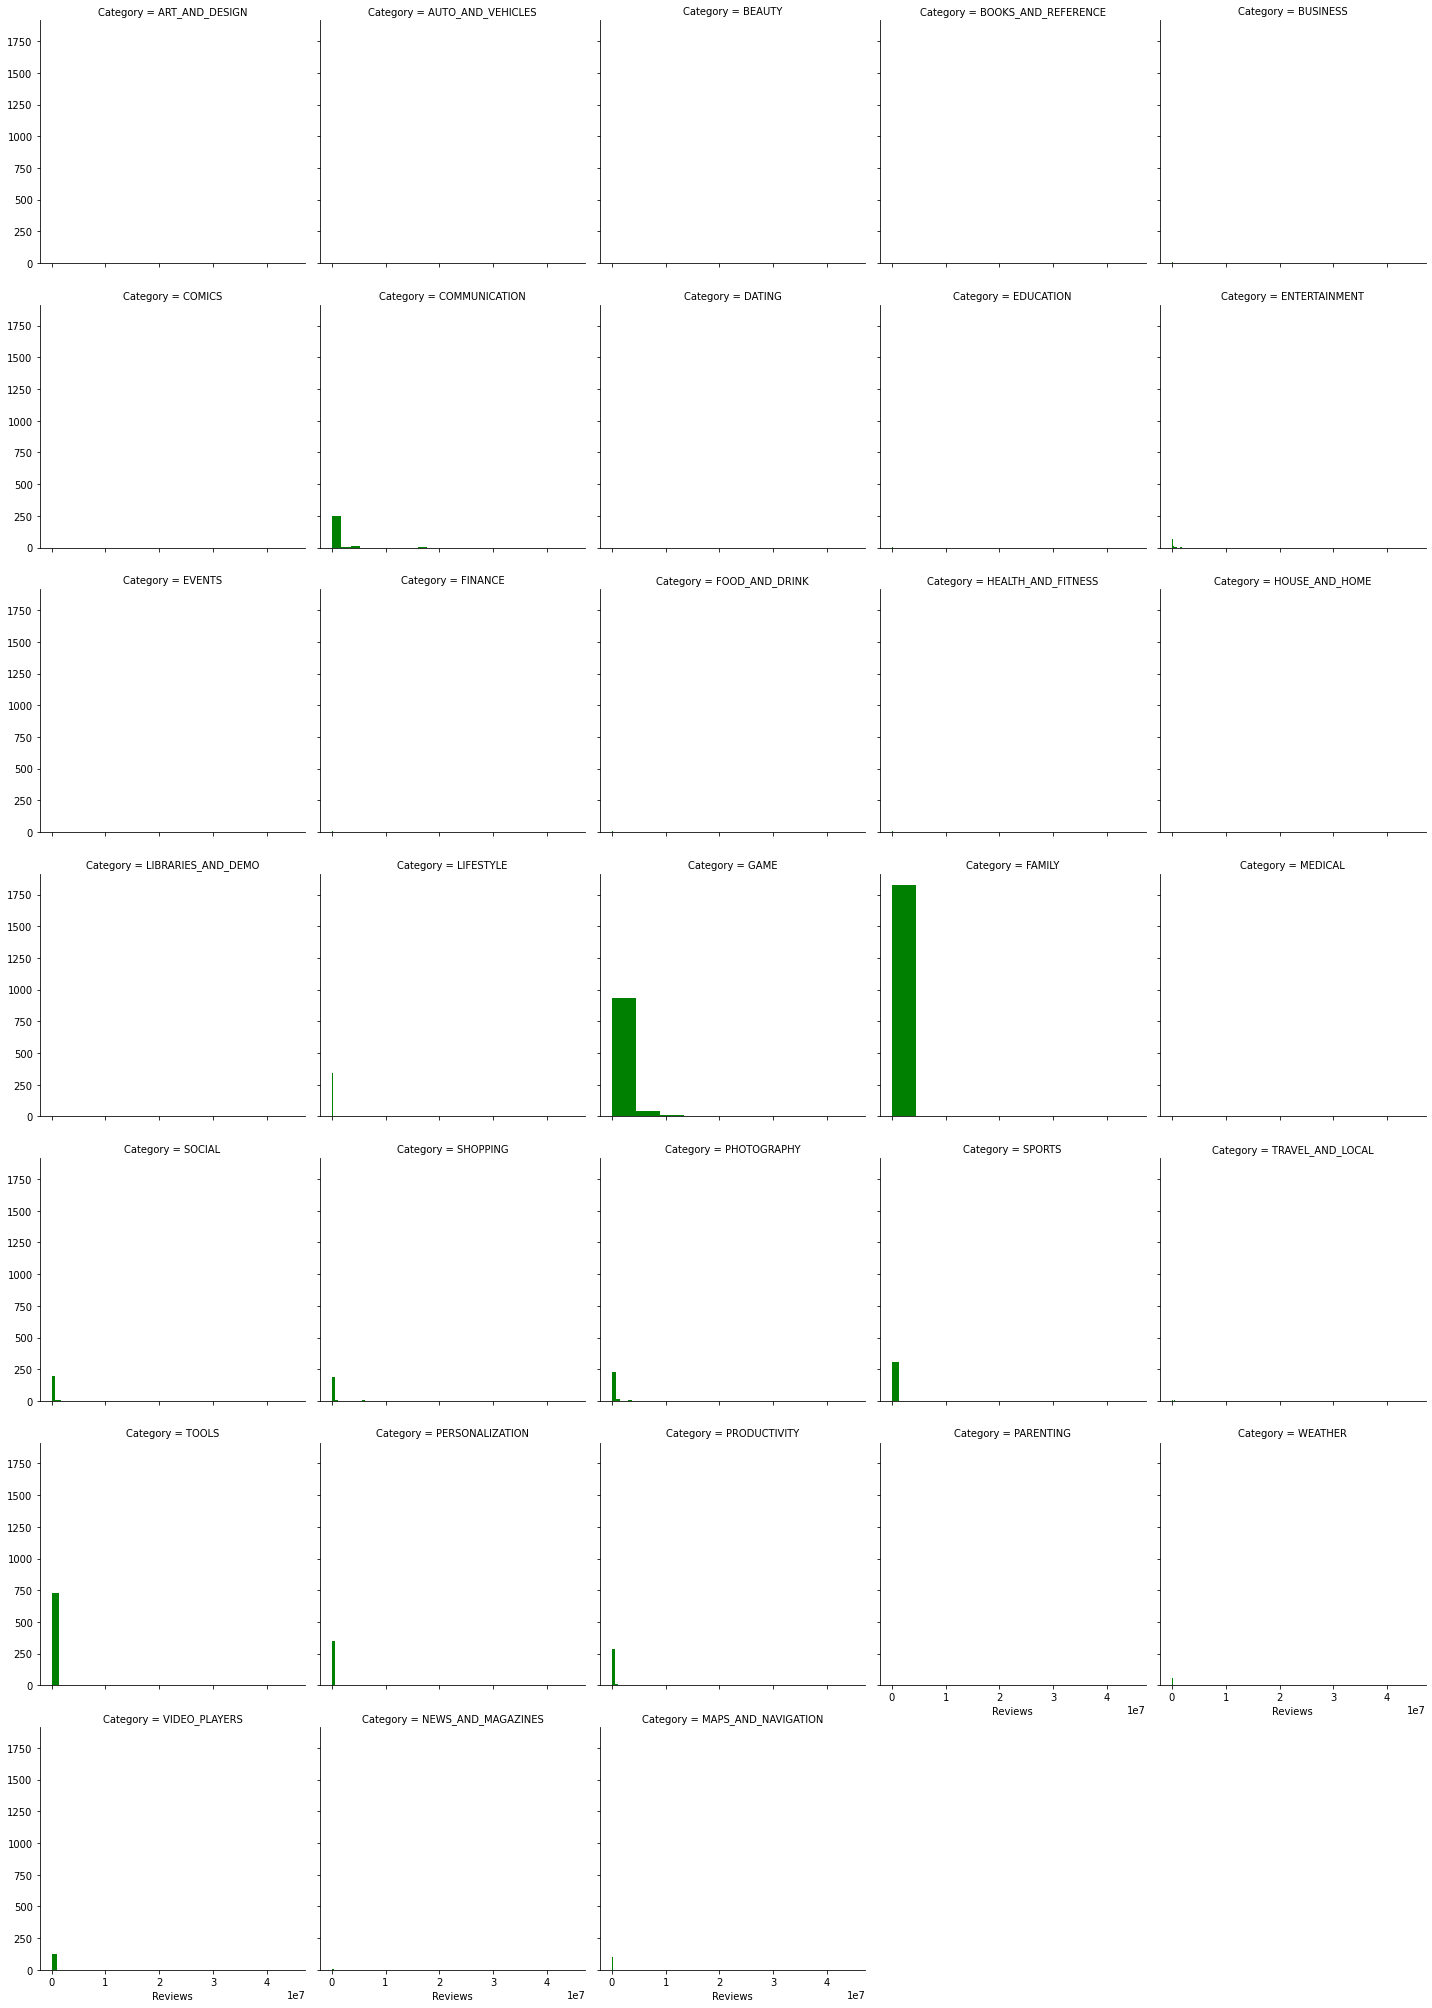

In [ ]:
g = sns.FacetGrid(df, col='Category', palette="Set1",  col_wrap=5, height=4)
g = (g.map(plt.hist, "Reviews", color="g"))

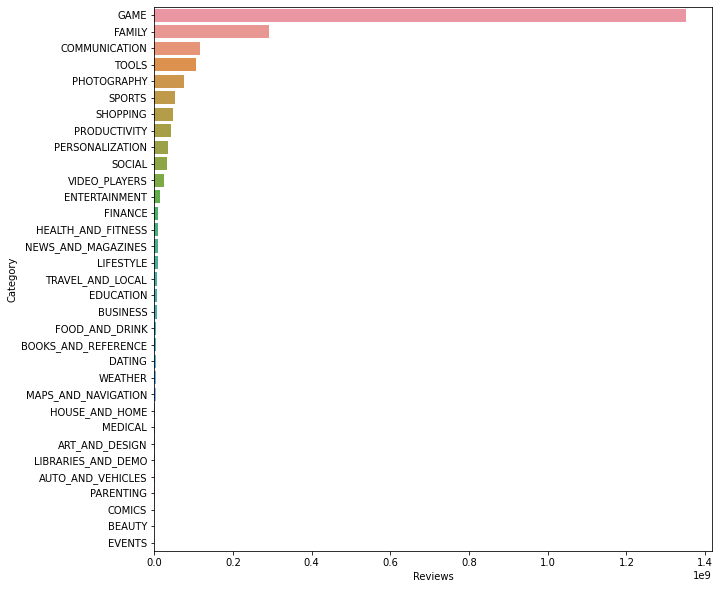

In [ ]:
#Total Review
plt.figure(figsize=(10,10))
sum_new=df.groupby(['Category'])['Reviews'].sum().sort_values(ascending=False)
sns.barplot(x=sum_new,y=sum_new.index,data=df)

**RESULT**


1.  The graph show the correlation between category and reviews ,family and game category had a lots of reviews.some app also almost had no review ,like event,beauty,medical,parenting and more.it is interesting event app has ahigh rating but rare review.


2.  Total review are more in game app,followed by communication ,social app.



## **5.which category has most free or paid app.**

In [ ]:
df.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
#there is 0 and null value ,letschange them to free
df['Type'].replace(to_replace=["0"],value=['Free'],inplace=True)
df['Type'].fillna('Free',inplace=True)

Category           Type
ART_AND_DESIGN     Free     59
                   Paid      3
AUTO_AND_VEHICLES  Free     73
                   Paid      2
BEAUTY             Free     47
                          ... 
TRAVEL_AND_LOCAL   Paid     10
VIDEO_PLAYERS      Free    130
                   Paid      1
WEATHER            Free     51
                   Paid      6
Name: Type, Length: 63, dtype: int64


<function matplotlib.pyplot.show>

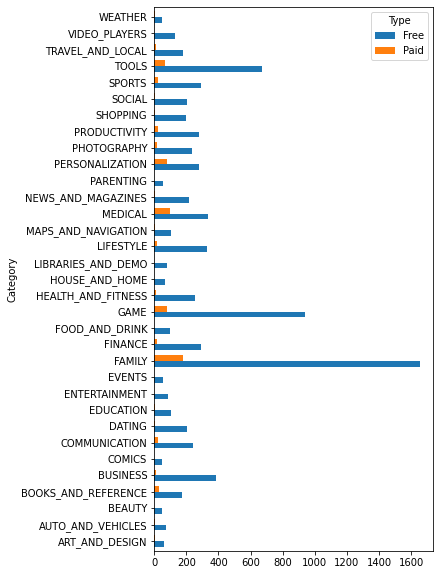

In [ ]:
#using group by method betwween category or type to count the value
print(df.groupby('Category')['Type'].value_counts())
Type_cat=df.groupby('Category')['Type'].value_counts().unstack().plot.barh(figsize=(5,10),width=0.7)
plt.show

**RESULT**


1.  family category has the most free and paid app on the play store.
2.   we can see social app is always free like entertainment ,event ,education,comic,and more.
3.  the medical has a high amount of paid app considering quantity of medical app is not much.



## **6.which category has more installation**

In [ ]:
df.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
             1000,  500000000,         50,        100,        500,
               10,          1,          5, 1000000000,          0])

To answer this question we need to create a separate data frame out of our df data frame which will contain a grouped value by Category and Installs

In [ ]:
highest_Installs_df = df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

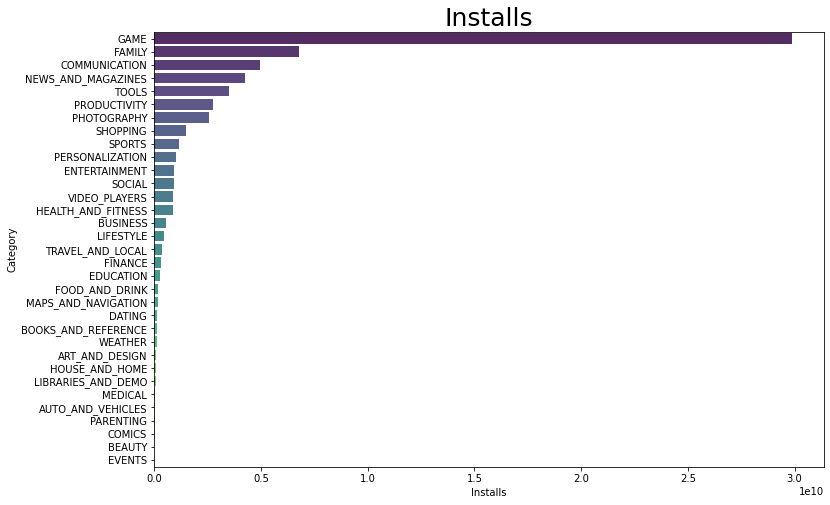

In [ ]:
x2sis = []
y2sis = []

for i in range(len(highest_Installs_df)):
    x2sis.append(highest_Installs_df.Installs[i])
    y2sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(12,8))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);


**RESULT**

More installation of app in game app ,followed by communication ,productivity.

When I saw total review or total installation graph ,conclude that more installation more review.

## **7.What is the distribution of rating per number of installs and type (paid or free) ?**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.3% of the points cannot be placed; y

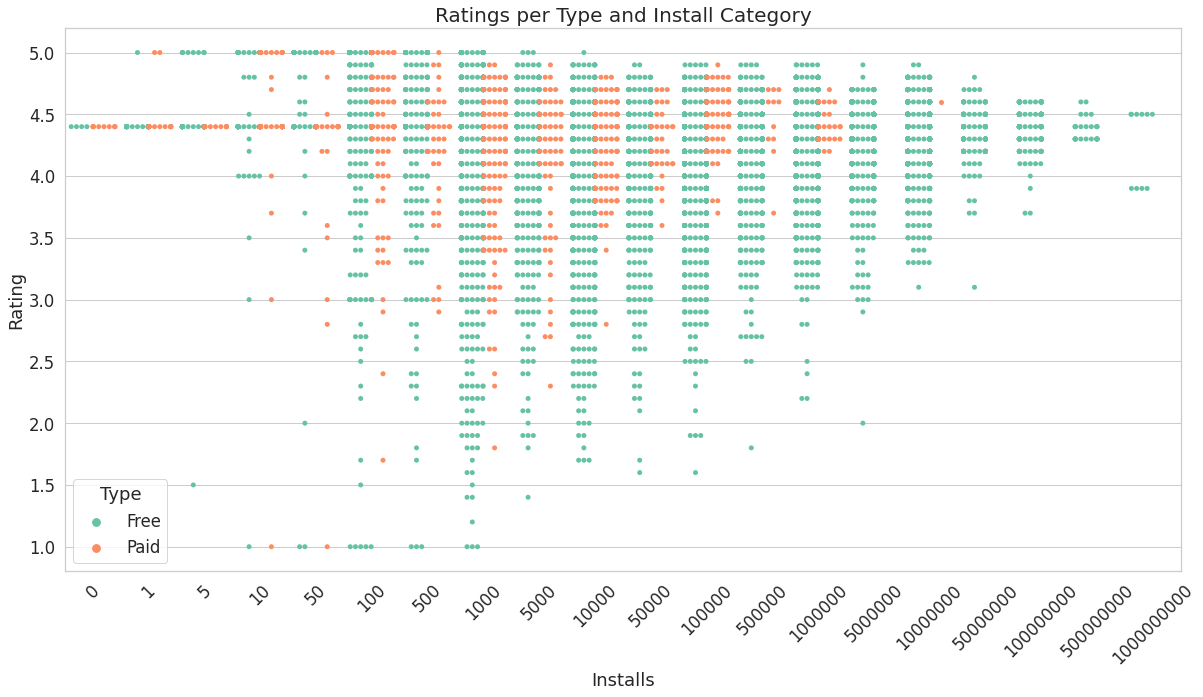

In [ ]:
#plot a swarmplot since there are multiple categories (Installs and Type)
sns.set(font_scale=1.5, style="whitegrid")
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.swarmplot(x="Installs", y="Rating", data=df, hue="Type", palette="Set2", dodge=True)
for item in ax.get_xticklabels():
    item.set_rotation(45)
    plt.title("Ratings per Type and Install Category", size=20)

**RESULT**

**Rating per Install Category and Type**


Looks like rating is distributed around 4.5 when its categorized per install category.

play store have very few paid apps.

### **8.Does the last update date has an effect on rating?**

In [ ]:
#Look at the last update column
print(df['Last Updated'].head())

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object


In [ ]:
from datetime import datetime as dt

In [ ]:
#change the date column to a date format from object type
df["Update_date"] = df['Last Updated'].apply(lambda x: dt.strptime(x, '%B %d, %Y').date())

In [ ]:
#fetch update year from date
df["Update_year"] = df["Update_date"].apply(lambda x: x.strftime('%Y')).astype('int64') 

Text(0.5, 1.0, 'Update Year VS Rating')

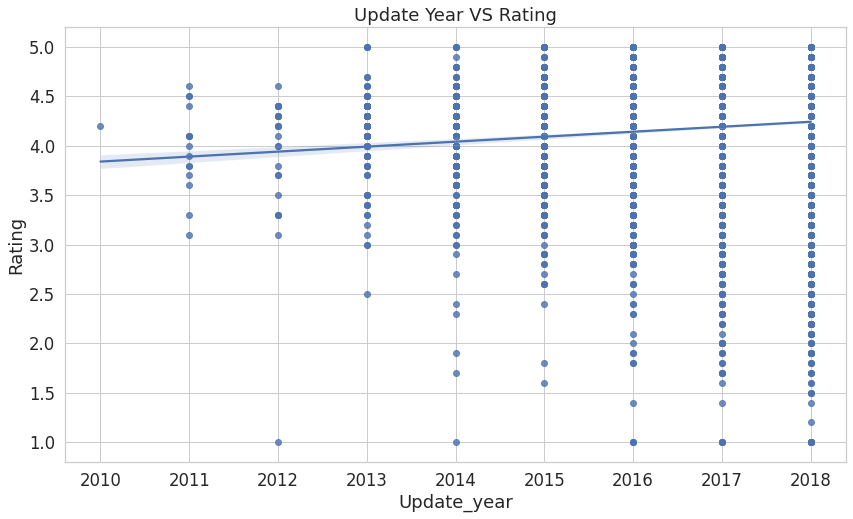

In [ ]:
#plotting the graph
fig, ax = plt.subplots(figsize=(14,8))
sns.regplot(x="Update_year", y="Rating", data=df)
plt.title("Update Year VS Rating")

**RESULT**
 
 App gets more recent updates chances of getting a higher rating increases.

### **9.Do we have a correlation between price of the app and rating?**

In [ ]:
#price was in string so change it into integer and remove special character
df['Decimal_price'] = df.Price.replace(to_replace = '\$', value='', regex=True)

In [ ]:
#change into plot
df.Decimal_price = df.Decimal_price.astype('float')

Text(0.5, 1.0, 'Price VS Rating')

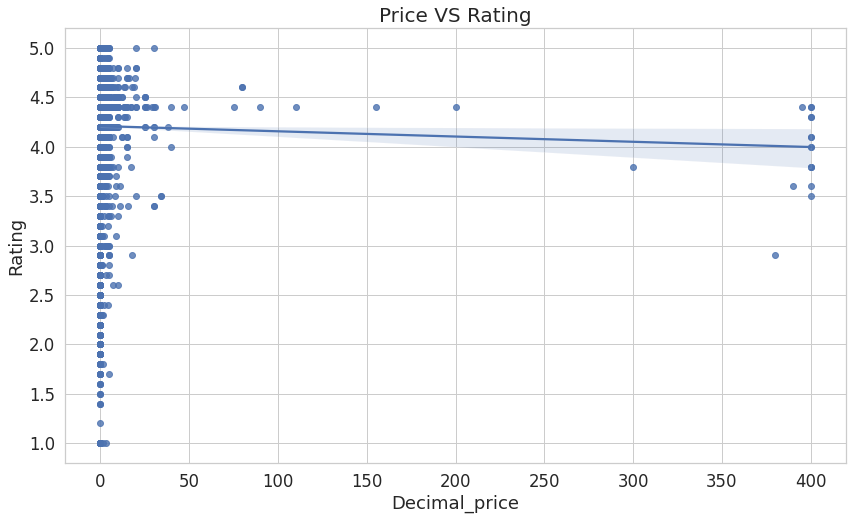

In [ ]:
#plotting graph
fig, ax = plt.subplots(figsize=(14,8))
sns.regplot(x="Decimal_price", y="Rating", data=df)
plt.title("Price VS Rating", size=20)

RESULT

Price VS Rating

Yes, as the price increases ratings received seems to decrease even below the average rating in the appstore.

Looks like apps either has a price lower than 100, or price greater than 300.


## **CONCLUTION**


1.Mostly round 4 version is used in every category
category family is used more app and then followed by game

2.The graph show the correlation between category and reviews ,family and game category had a lots of reviews.some app also almost had no review ,like event,beauty,medical,parenting and more.it is interesting event app has ahigh rating but rare review.

3.Total review are more in game app,followed by communication ,social app.

4.There are 34 category are present in this data set.

5.There is around 2000 app with family category ,followed by game category with 1200 app.And this 1.9 category,i donot know what it is but it had only 1 app .so,its not visible on graph.

6.Most of the rating is around 4

8.More rating is in game app

9.Family category has the most free and paid app on the play store.

10.we can see social app is always free like entertainment ,event ,education,comic,and more.

11.the medical has a high amount of paid app considering quantity of medical app is not much.

12.More installation of app in game app ,followed by communication ,productivity

13.when i saw total review or tital installation graph ,conclude that more installation more review

14.Looks like rating is distributed around 4.5 when its categorized per install category

15.play store have very few paid apps

16.App gets more recent updates chances of getting a higher rating increases

17.Price VS Rating;-the price increases ratings received seems to decrease even below the average rating in the appstore

18.Looks like apps either has a price lower than 100, or price greater than 300





## **SUMMARY**
We tried to analyse the data for following question


1.  Does the last update date has effect on rating?
2.  Do we have a corellation between the price of app and rating?
3.  what is the distribution of rating per number of installs and type
     (free or paid) 
4.  Which category has more installation?
5.  Which category has most free or paid app?
6.  Which category has a lots of review is more installation .Is review related 
     to installation(more review more installation)?
7.  How rating of apps look like,Look rating pattern of each category?
8.  How many category and which one is famous category?
9.  which anderoid version should have before accessing the app?



**REFERENCE**

1.Almabetter video

2.Almabetter colab notebook

3.cleverprogrammer.com



